In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [47]:
dummy_stock =[]
movements = []
dummy_stock.append(25)
for n in range(0,100):
    movement = np.random.uniform(-1,1)
    dummy_stock.append(dummy_stock[-1]+(2*movement))
    movements.append(2*movement)

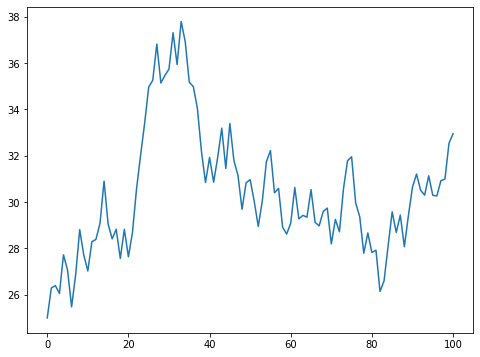

In [49]:
plt.figure(figsize=(8,6))
plt.plot(range(0,101),dummy_stock)

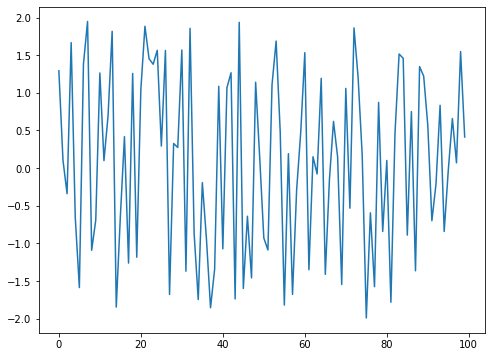

In [51]:
plt.figure(figsize=(8,6))
plt.plot(range(0,100),movements)

In [56]:
alpha_api = 'EUX2MC8HFWETMMU2'
#ticker_list = ['AAPL','AMZN','TSLA','NFLX','TWTR','YELP','SQ','FB','GOOGL']
ticker_list = ['AAPL']
for ticker in ticker_list:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=full&apikey={alpha_api}'
    resp = requests.get(url)
    df = pd.DataFrame(resp.json()['Time Series (Daily)']).T
df.index=pd.to_datetime(df.index)
df['1. open'] = df['1. open'].astype(float)

ConnectionError: HTTPSConnectionPool(host='www.alphavantage.co', port=443): Max retries exceeded with url: /query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=EUX2MC8HFWETMMU2 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x122d24d30>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [57]:
df['1. open'] = df['1. open'].astype(float)

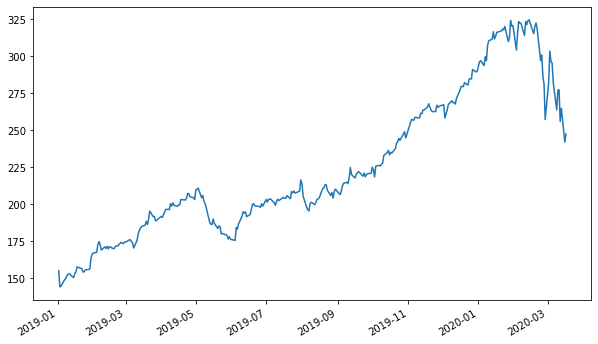

In [96]:
plt.figure(figsize=(10,6))
df['1. open']['2020':'2019'].plot()

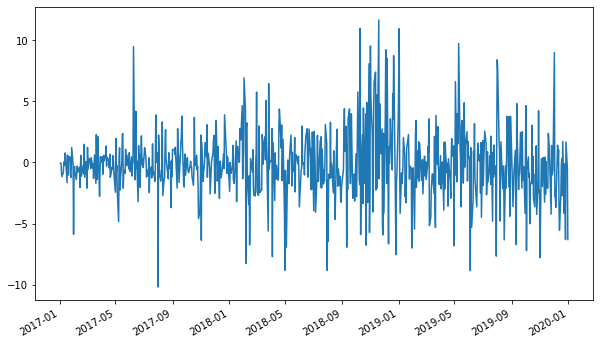

In [65]:
df['change'] = df['1. open']-df['1. open'].shift(1)
plt.figure(figsize=(10,6))
df['change']['2019':'2017'].plot()

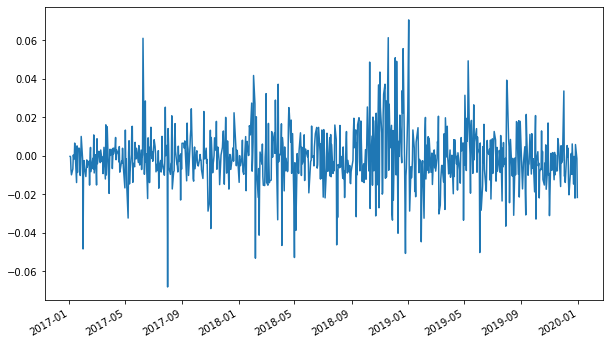

In [143]:
df['change_pct'] = (df['1. open']-df['1. open'].shift(1))/df['1. open']
plt.figure(figsize=(10,6))
df['change_pct']['2019':'2017'].plot()

Text(0.5, 1.0, 'Quarterly global iPhone sales in millions')

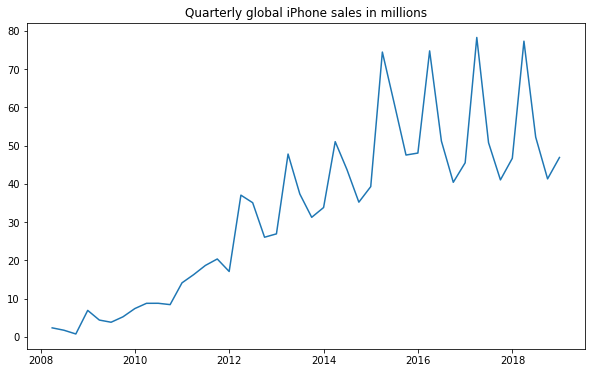

In [153]:
iphone_sales= [2.32,1.7,.72,6.89,4.36,3.79,5.21,7.37,8.74,8.75,8.4,14.1,16.24,18.65,20.34,17.07,37.04,
               35.06,26.03,26.91,47.79,37.34,31.24,33.8,51.03,43.72,35.2,39.27,74.47,61.17,47.53,48.05,74.78,
               51.19,40.4,45.51,78.29,50.76,41.03,46.68,77.32,52.22,41.3,46.89]
plt.figure(figsize=(10,6))
plt.plot(pd.DatetimeIndex(freq='Q',start='2008-01-01',end='2019-01-01'),iphone_sales)
plt.title('Quarterly global iPhone sales in millions')

In [66]:
passengers = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

Text(0, 0.5, 'Total passengers (thousands)')

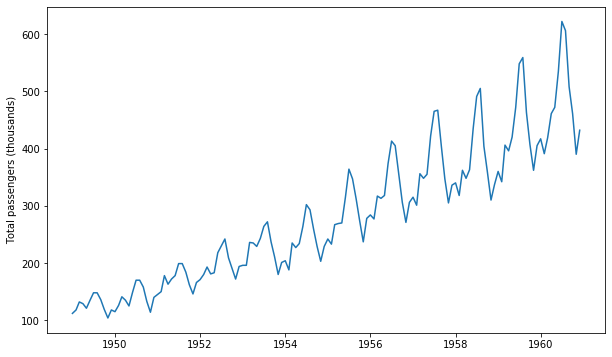

In [154]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.ylabel('Total passengers (thousands)')

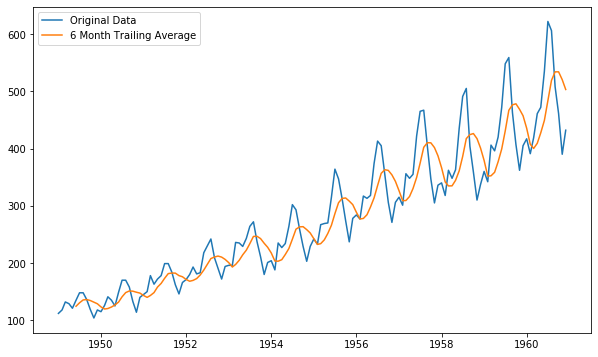

In [156]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(6).mean(),
         label='6 Month Trailing Average')
plt.legend()

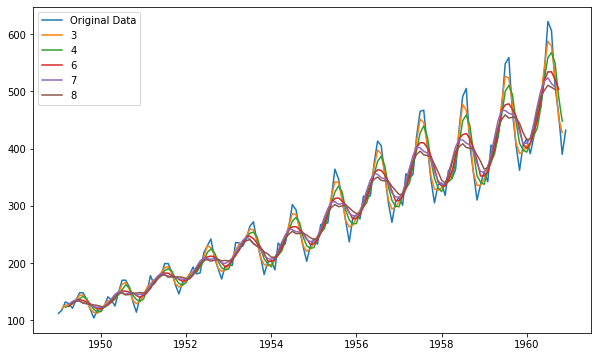

In [164]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(3,center=True).mean(),
         label='3')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(4,center=True).mean(),
         label='4')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(6,center=True).mean(),
         label='6')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(7,center=True).mean(),
         label='7')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(8,center=True).mean(),
         label='8')
plt.legend()

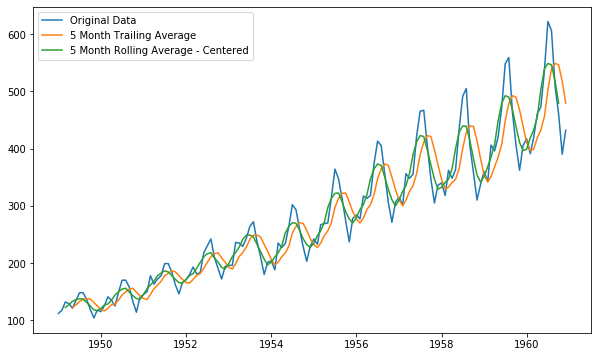

In [169]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(5).mean(),
         label='5 Month Trailing Average')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(5,center=True).mean(),
         label='5 Month Rolling Average - Centered')


plt.legend()

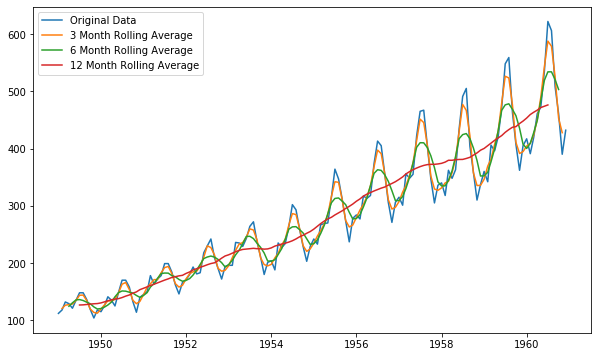

In [94]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(3,center=True).mean(),
         label='3 Month Rolling Average')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(6,center=True).mean(),
         label='6 Month Rolling Average')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(12,center=True).mean(),
         label='12 Month Rolling Average')

plt.legend()

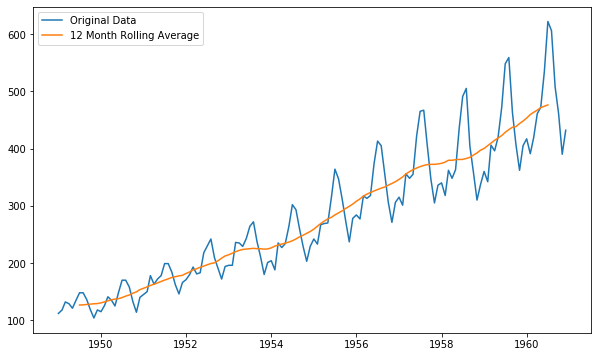

In [170]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['Thousands of Passengers'].rolling(12,center=True).mean(),
         label='12 Month Rolling Average')

plt.legend()

In [97]:
passengers['12M_window'] = passengers['Thousands of Passengers'].rolling(12,center=True).mean()
passengers['12M_residuals'] = passengers['Thousands of Passengers'] - passengers['12M_window']


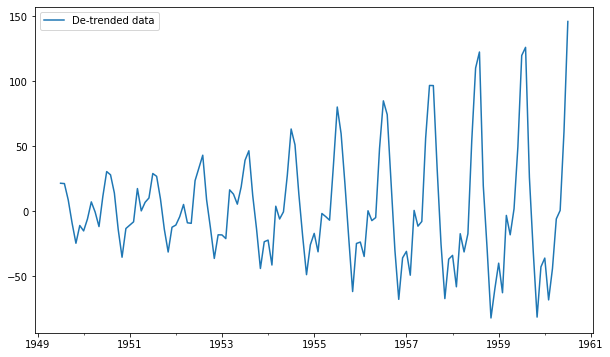

In [180]:
ax = passengers['12M_residuals'].plot(figsize=(10,6),label='De-trended data')
ax.set_xlabel('')
plt.legend()

In [118]:
seasonal_adj = passengers['12M_residuals'].groupby(by=[passengers.index.month]).mean()

Text(0, 0.5, 'Average difference between original data and trend')

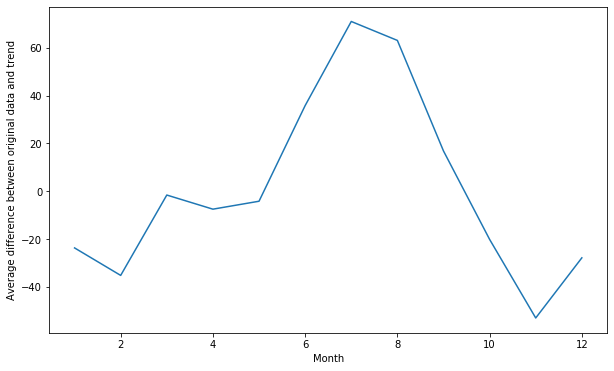

In [182]:
ax = seasonal_adj.plot(figsize=(10,6))
ax.set_ylabel("Average difference between original data and trend")

In [112]:
passengers[passengers.index.month==1]['12M_residuals'].mean()

-23.704545454545453

In [135]:
passengers['trend_plus_season'] = [passengers['12M_window'].iloc[n]+seasonal_adj[(n%12)+1] 
                                   for n in range(0,len(passengers))]

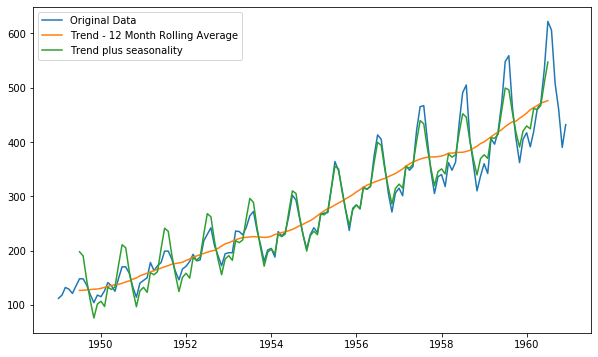

In [183]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['12M_window'],label='Trend - 12 Month Rolling Average')
plt.plot(passengers.index,passengers['trend_plus_season'],label='Trend plus seasonality')
plt.legend()

In [138]:
passengers['12M_multiplicative_resid'] = passengers['Thousands of Passengers']/passengers['12M_window']
multiplicative_adj = passengers['12M_multiplicative_resid'].groupby(by=[passengers.index.month]).mean()
passengers['multiplicative_plus_season'] = [passengers['12M_window'].iloc[n]*multiplicative_adj[(n%12)+1] for n in range(0,len(passengers))]

Text(0.5, 0, '')

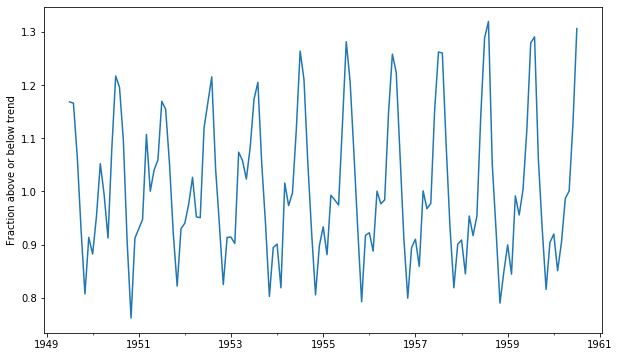

In [187]:
ax = passengers['12M_multiplicative_resid'].plot(figsize=(10,6))
ax.set_ylabel('Fraction above or below trend')
ax.set_xlabel('')

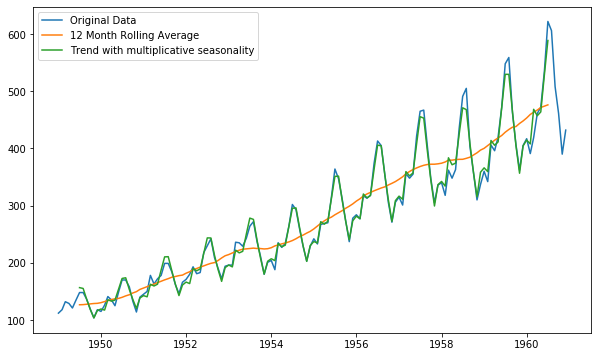

In [141]:
plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['12M_window'],label='12 Month Rolling Average')
plt.plot(passengers.index,passengers['multiplicative_plus_season'],label='Trend with multiplicative seasonality')
plt.legend()

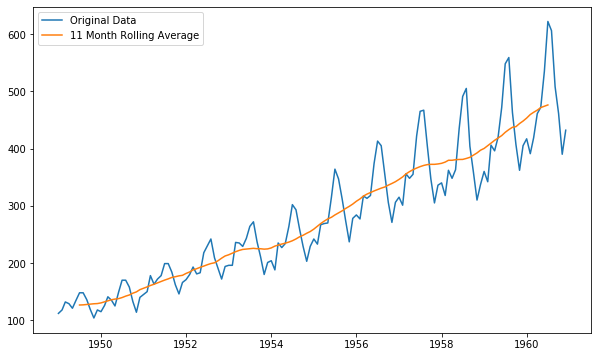

In [191]:
passengers['11_window'] = passengers['Thousands of Passengers'].rolling(12,center=True).mean()
passengers['11M_residuals'] = passengers['Thousands of Passengers']/ passengers['11_window']
bad_multiplicative_adj = passengers['11M_residuals'].groupby(by=[passengers.index.month]).mean()

plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['11_window'],label='11 Month Rolling Average')
plt.legend()

In [227]:
weird_period_values = {}
for n in range(0,len(list(passengers['11M_residuals']))):
    if np.isnan(list(passengers['11M_residuals'])[n]) == False:
        weird_period_values[(n%11)+1] = weird_period_values.get((n%11)+1,[]) + [list(passengers['11M_residuals'])[n]]


In [228]:
weird_period_values

{7: [1.1684210526315788,
  1.0810157194679564,
  1.0403225806451613,
  0.952213941253836,
  1.0739476678043232,
  0.8188747731397459,
  0.9334619093539055,
  0.9174917491749175,
  0.799410029498525,
  0.931752069814276,
  1.050259965337955,
  1.2907446603809891,
  1.3062653132656632],
 8: [1.1661195009848981,
  1.217183770883055,
  1.0595238095238095,
  0.9506493506493506,
  1.0581613508442775,
  1.015850144092219,
  0.8811849984242042,
  0.9223274695534506,
  0.8945188794153471,
  0.8189751622286865,
  0.9244635193133047,
  1.0590926420129623],
 9: [1.0659699542782495,
  1.1957796014067996,
  1.169441723800196,
  1.1198630136986303,
  1.023463687150838,
  0.9735525375268049,
  0.992872637124264,
  0.8878205128205128,
  0.910185408138695,
  0.9006030824212643,
  0.7901444350042481,
  0.9286936679977182],
 10: [0.9272727272727272,
  1.0959537572254336,
  1.1547388781431334,
  1.16751269035533,
  1.0828072781284812,
  0.9971590909090909,
  0.9841463414634147,
  1.0005260389268806,
  0.85

In [229]:
weird_avgs = {}
for n in range(1,12):
    weird_avgs[n] = sum(weird_period_values[n])/len(weird_period_values[n])

In [230]:
weird_avgs

{1: 0.9919632540915361,
 2: 0.9985982478230803,
 3: 1.005200905592549,
 4: 1.0223936585273927,
 5: 1.029390680008772,
 6: 1.013173761878714,
 7: 1.0280139562899104,
 8: 0.9973375498271304,
 9: 0.996532521780685,
 10: 0.9868663671201526,
 11: 0.9890659405493659}

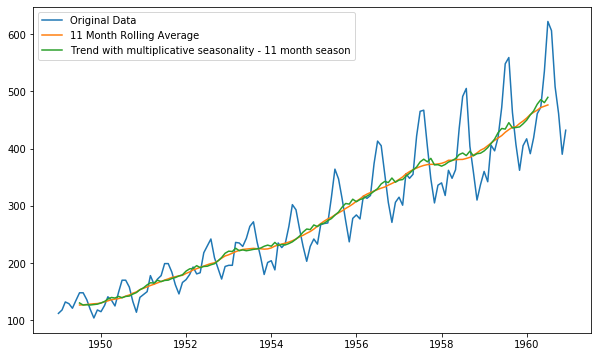

In [231]:
passengers['multiplicative_11'] = [passengers['11_window'].iloc[n]*weird_avgs[(n%11)+1] for n in range(0,len(passengers))]

plt.figure(figsize=(10,6))
plt.plot(passengers.index,passengers['Thousands of Passengers'],label='Original Data')
plt.plot(passengers.index,passengers['11_window'],label='11 Month Rolling Average')
plt.plot(passengers.index,passengers['multiplicative_11'],label='Trend with multiplicative seasonality - 11 month season')
plt.legend()